In [1]:
import pandas as pd

df = pd.read_excel('data/default of credit card clients.xls',
                   skiprows=1,
                   index_col=0)

target_col = 'default payment next month'
features = df.drop(target_col, axis=1)
targets = df[target_col]

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Evaluating classification algorithm performance with metrics

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    targets,
                                                    train_size=0.75,
                                                    stratify=targets)

In [3]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## Accuracy

In [4]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.7787555555555555
0.7788


In [5]:
df['default payment next month'].value_counts() / df.shape[0]

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [6]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='most_frequent')
dc.fit(x_train, y_train)
print(dc.score(x_train, y_train))
print(dc.score(x_test, y_test))

0.7788
0.7788


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

gnb = GaussianNB()
lr_cv = LogisticRegressionCV()
lr_cv.fit(features, targets)
lr_best_c = LogisticRegression(C=lr_cv.C_[0])
knn = KNeighborsClassifier()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [8]:
lr_cv.C_

array([0.04641589])

In [9]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(gnb, features, targets, n_jobs=-1).mean())
print(cross_val_score(lr_best_c, features, targets, n_jobs=-1).mean())
print(cross_val_score(knn, features, targets, n_jobs=-1).mean())
print(cross_val_score(knn, scaled_features, targets, n_jobs=-1).mean())

0.37909999999999994
0.7785333333333334
0.7551
0.7915333333333333


## Cohen's Kappa

In [10]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, lr_model.predict(x_test))

0.0

In [11]:
from sklearn.metrics import make_scorer

print(cross_val_score(lr_model,
                      features,
                      targets,
                      scoring=make_scorer(cohen_kappa_score),
                      n_jobs=-1).mean())

-6.663869982279636e-05


## The confusion matrix

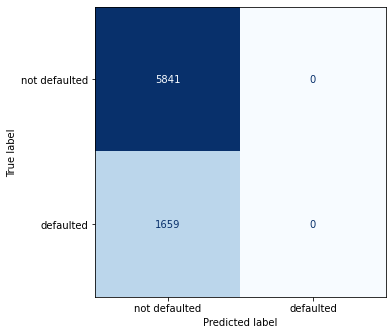

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
plot_confusion_matrix(lr_model,
                      x_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      display_labels=['not defaulted', 'defaulted'],
                      colorbar=False,  # this argument only works with sklearn version 0.24 and up
                      ax=ax)

plt.tight_layout()

Using the yellowbrick package:

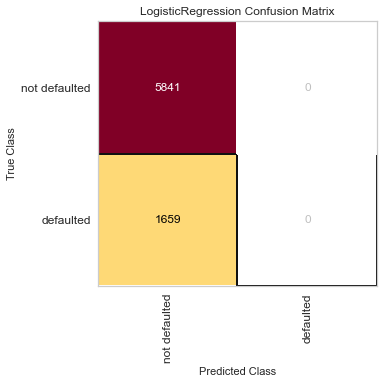

<Figure size 576x396 with 0 Axes>

In [13]:
from yellowbrick.classifier import confusion_matrix as yb_confusion_matrix

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
yb_confusion_matrix(
    lr_model,
    x_train, y_train, x_test, y_test,
    classes=['not defaulted', 'defaulted'],
    ax=ax)
plt.tight_layout()

Using the mlxtend package:

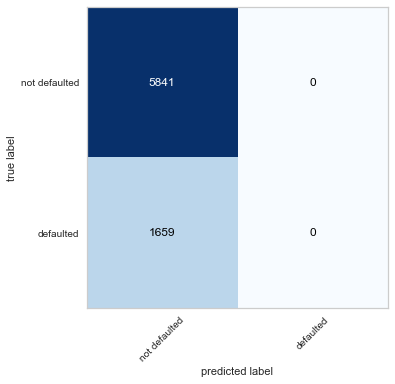

In [14]:
from mlxtend.plotting import plot_confusion_matrix as mlx_plot_cm
from sklearn.metrics import confusion_matrix

mlx_plot_cm(conf_mat=confusion_matrix(y_test, lr_model.predict(x_test)),
                     class_names=['not defaulted', 'defaulted'])
plt.tight_layout()

In [15]:
pay_0_target = df['PAY_0'].replace({i: 1 for i in range(1, 9)})
pay_0_features = df.drop(['PAY_0', 'default payment next month'],
                         axis=1)

lr_multi = LogisticRegression(max_iter=1000)
lr_multi.fit(pay_0_features, pay_0_target)

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

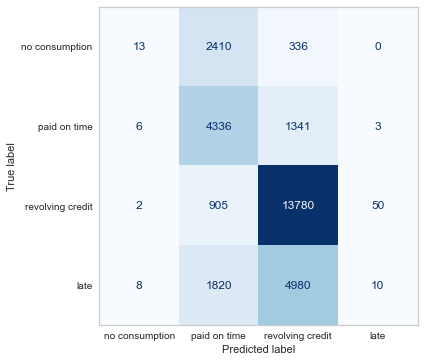

In [16]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_confusion_matrix(lr_multi,
                      pay_0_features,
                      pay_0_target,
                      display_labels=['no consumption',
                                      'paid on time',
                                      'revolving credit',
                                      'late'],
                      cmap=plt.cm.Blues,
                      colorbar=False,
                      ax=ax)
plt.tight_layout()
ax.grid(False)

In [17]:
import swifter

pay_cols = ['PAY_0'] + [f'PAY_{i}' for i in range(2, 7)]
mo_targets = df[pay_cols].copy()
mo_targets = mo_targets.swifter.apply(lambda x: (x > 0).astype(int), axis=1)

mo_features = df[[c for c in df.columns if c not in pay_cols +
                  ['default payment next month']]]

In [18]:
from sklearn.multioutput import MultiOutputClassifier

mo_clf = MultiOutputClassifier(LogisticRegression(max_iter=1000), n_jobs=-1)
mo_clf.fit(mo_features, mo_targets)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

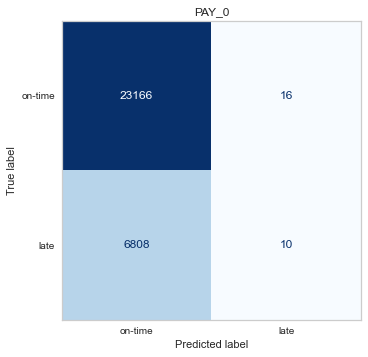

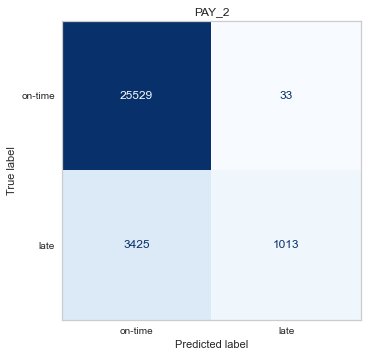

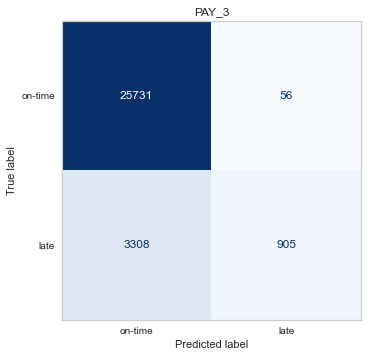

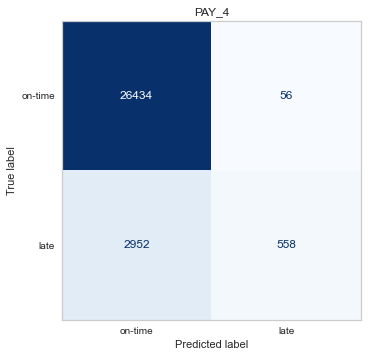

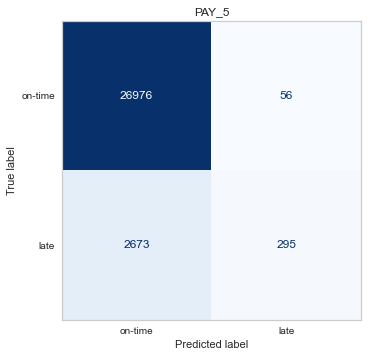

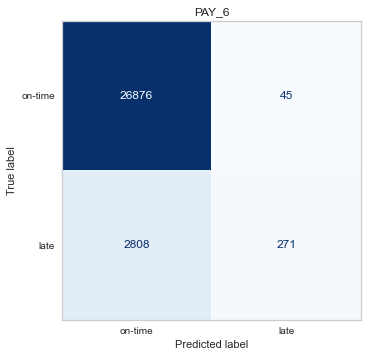

In [19]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

ml_cm = multilabel_confusion_matrix(mo_targets, mo_clf.predict(mo_features))

for i, cl in enumerate(mo_targets.columns):
    f = ConfusionMatrixDisplay(ml_cm[i], display_labels=['on-time', 'late'])
    f.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(cl)
    plt.grid(b=None)

## Precision, Recall, and the F1 score

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,
                            lr_model.predict(x_test),
                            target_names=['no default', 'default']))

              precision    recall  f1-score   support

  no default       0.78      1.00      0.88      5841
     default       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500



C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\words\anaconda3\envs\datasci\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
C:\Users\words\anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


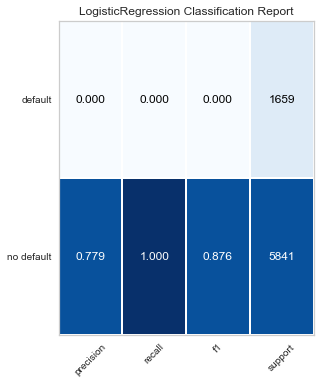

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [21]:
from yellowbrick.classifier import ClassificationReport

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
viz = ClassificationReport(lr_model,
                           support=True,
                           classes=['no default', 'default'],
                           cmap='Blues')
viz.score(x_test, y_test)
plt.gcf().delaxes(f.axes[1])
viz.show()

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


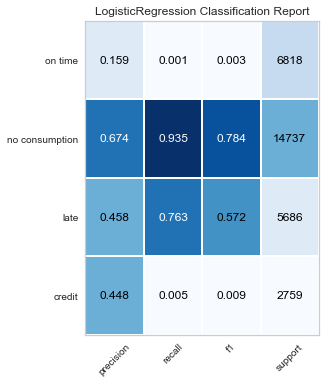

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [22]:
f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
viz = ClassificationReport(lr_multi,
                           support=True,
                           classes=['no consumption', 'on time', 'credit', 'late'],
                           cmap='Blues')
viz.score(pay_0_features, pay_0_target)
plt.gcf().delaxes(f.axes[1])
viz.show()

In [23]:
print(classification_report(pay_0_target,
                            lr_multi.predict(pay_0_features),
                            target_names=['no consumption',
                                          'on time',
                                          'credit',
                                          'late']
                           )
     )

                precision    recall  f1-score   support

no consumption       0.45      0.00      0.01      2759
       on time       0.46      0.76      0.57      5686
        credit       0.67      0.94      0.78     14737
          late       0.16      0.00      0.00      6818

      accuracy                           0.60     30000
     macro avg       0.43      0.43      0.34     30000
  weighted avg       0.50      0.60      0.49     30000



## AUC score

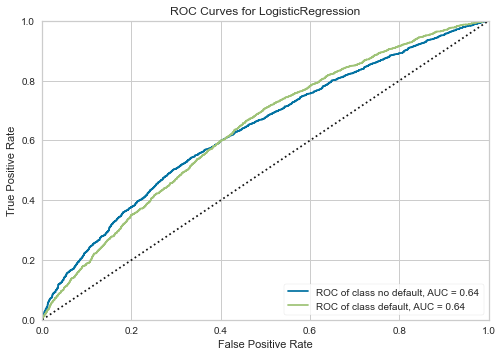

In [24]:
from yellowbrick.classifier.rocauc import roc_auc

roc = roc_auc(lr_model,
              x_train,
              y_train,
              x_test,
              y_test,
              classes=['no default', 'default'],
              macro=False,
              micro=False)

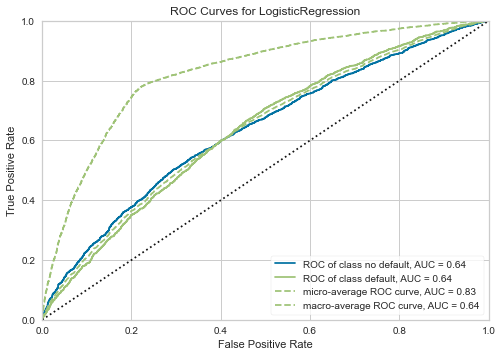

In [25]:
roc = roc_auc(lr_model,
              x_train,
              y_train,
              x_test,
              y_test,
              classes=['no default', 'default'])

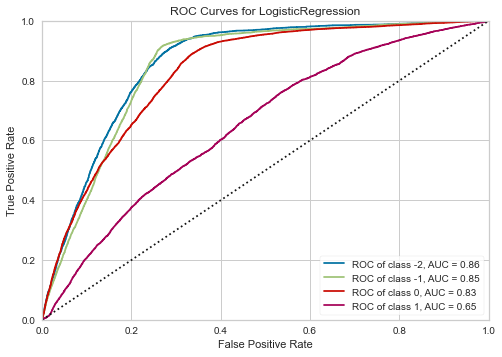

In [26]:
from sklearn.metrics import plot_roc_curve

roc = roc_auc(lr_multi, pay_0_features, pay_0_target, macro=False, micro=False)

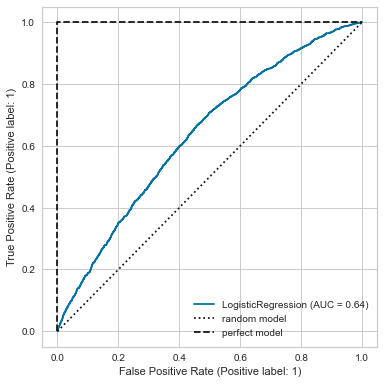

In [27]:
from sklearn.metrics import plot_roc_curve

f, ax = plt.subplots(1, 1, figsize=(5.5, 5.5))
roc = plot_roc_curve(lr_model, x_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], c='k', linestyle='dotted', label='random model')
plt.plot([0, 0, 1],
         [0, 1, 1],
         c='k',
         linestyle='dashed',
         label='perfect model')
plt.legend()
plt.tight_layout()

In [28]:
roc.roc_auc

0.6352462725558627

### Choosing the optimal threshold

In [29]:
roc.tpr

array([0.00000000e+00, 6.02772755e-04, 6.02772755e-04, ...,
       9.99397227e-01, 1.00000000e+00, 1.00000000e+00])

In [30]:
roc.fpr

array([0.00000000e+00, 0.00000000e+00, 3.42407122e-04, ...,
       9.97603150e-01, 9.97603150e-01, 1.00000000e+00])

0.24176734301323635

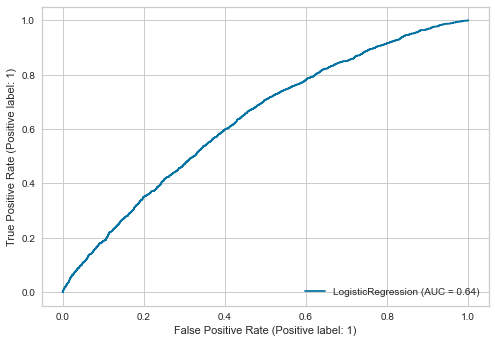

In [31]:
import numpy as np

roc = plot_roc_curve(lr_model, x_test, y_test, drop_intermediate=False)
youdens_idx = np.argmax(roc.tpr - roc.fpr)
thresholds = np.unique(lr_model.predict_proba(x_test)[:, 1])
thresholds.sort()
thresholds = [1] + list(thresholds[::-1])
y_thresh = thresholds[youdens_idx]
y_thresh

In [32]:
upper_left_array = np.vstack((np.zeros(roc.tpr.shape[0]),
                              np.ones(roc.tpr.shape[0]))).T
roc_curve_points = np.vstack((roc.fpr, roc.tpr)).T
topleft_idx = np.argmin(np.linalg.norm(upper_left_array - roc_curve_points,
                                       axis=1))
tl_thresh = thresholds[topleft_idx]
tl_thresh

0.24912979566872523

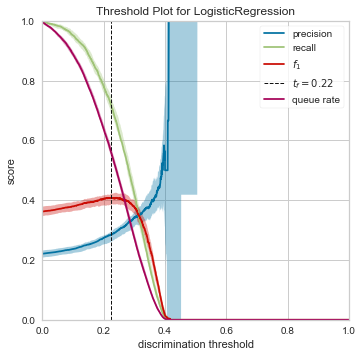

In [33]:
from yellowbrick.classifier.threshold import discrimination_threshold

f = plt.figure(figsize=(5.5, 5.5))
dt = discrimination_threshold(lr_model, x_train, y_train, show=False)

In [34]:
f_idx = dt.cv_scores_['fscore'].argmax()
f_thresh = dt.thresholds_[f_idx]
f_thresh

0.22472924187725632

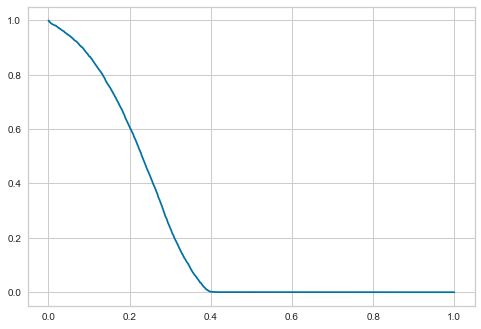

In [35]:
# the "queue rate"
plt.plot(thresholds, roc.fpr)

In [36]:
from sklearn.metrics import accuracy_score

for t in [y_thresh, tl_thresh, f_thresh]:
    print(accuracy_score(y_test, lr_model.predict_proba(x_test)[:, 1] >= t))

0.5702666666666667
0.5837333333333333
0.5322666666666667


<Figure size 396x396 with 0 Axes>

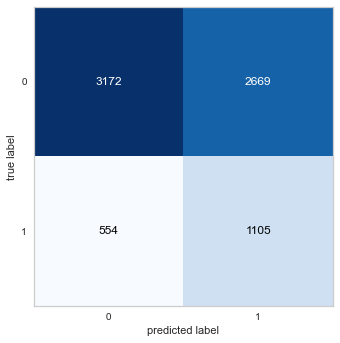

In [37]:
f = plt.figure(figsize=(5.5, 5.5))
predictions = lr_model.predict_proba(x_test)[:, 1] >= y_thresh
mlx_plot_cm(confusion_matrix(y_test, predictions))
f.tight_layout()

# Sampling

## Downsampling

In [38]:
_, x_sample, _, y_sample = train_test_split(features,
                                            targets,
                                            test_size=0.1,
                                            stratify=targets,
                                            random_state=42)

In [39]:
np.bincount(y_sample) / y_sample.shape[0]

array([0.77866667, 0.22133333])

In [40]:
targets.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [41]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(features, targets)

In [42]:
y_resampled.value_counts()

0    6636
1    6636
Name: default payment next month, dtype: int64

In [43]:
y_train.value_counts()

0    17523
1     4977
Name: default payment next month, dtype: int64

## Oversampling

In [44]:
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [45]:
y_resampled.value_counts()

0    17523
1    17523
Name: default payment next month, dtype: int64

In [46]:
lr_model = LogisticRegressionCV(max_iter=1000)
lr_model.fit(x_train, y_train)
print('unmodified:',
      roc_auc_score(y_test,
                    lr_model.predict_proba(x_test)[:, 1])
     )

unmodified: 0.6355382164221468


In [47]:
lr_model_rs = LogisticRegressionCV(max_iter=1000)
lr_model_rs.fit(x_resampled, y_resampled)
print('resampled:',
      roc_auc_score(y_test,
                    lr_model_rs.predict_proba(x_test)[:, 1])
     )

resampled: 0.6836994602495567


## SMOTE and other synthetic sampling methods

In [48]:
from imblearn.over_sampling import KMeansSMOTE

kmSMOTE = KMeansSMOTE(k_neighbors=5,
                      cluster_balance_threshold=0.2,
                      random_state=42,
                      n_jobs=-1)
x_resampled, y_resampled = kmSMOTE.fit_resample(x_train, y_train)

lr_model_rs = LogisticRegressionCV(max_iter=1000)
lr_model_rs.fit(x_resampled, y_resampled)
print('resampled:',
      roc_auc_score(y_test,
                    lr_model_rs.predict_proba(x_test)[:, 1])
     )

resampled: 0.635641413264241


In [49]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

samplers = [
    SMOTE(random_state=42),
    BorderlineSMOTE(random_state=42, kind="borderline-1"),
    BorderlineSMOTE(random_state=42, kind="borderline-2"),
    SVMSMOTE(random_state=42),
    ADASYN(random_state=42),
    SMOTEENN(random_state=42),
    SMOTETomek(random_state=42)
]

for s in samplers:
    x_resampled, y_resampled = s.fit_resample(x_train, y_train)
    lr_model_rs = LogisticRegressionCV(max_iter=1000)
    lr_model_rs.fit(x_resampled, y_resampled)
    ra_score = roc_auc_score(y_test,
                             lr_model_rs.predict_proba(x_test)[:, 1])
    print(f'{str(s):<55} {ra_score}')

SMOTE(random_state=42)                                  0.6566683890219611
BorderlineSMOTE(random_state=42)                        0.6570818987682322
BorderlineSMOTE(kind='borderline-2', random_state=42)   0.6519340274972114
SVMSMOTE(random_state=42)                               0.6606537478667923
ADASYN(random_state=42)                                 0.653273006523382
SMOTEENN(random_state=42)                               0.6750974874768052
SMOTETomek(random_state=42)                             0.6568693132735184
